# Californian Housing Market




In Sklearn, there are datasets that are already pre-recorded that we can use for our purposes to apply Machine Learning algorithms. Let's try to look at the first one with Boston Housing Market.

1. Import the usual librairies

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "svg" # to be replaced by "iframe" if working on JULIE

2. Use the following lines of code to retrieve California real estate price data:

In [2]:
from sklearn import datasets
data = datasets.fetch_california_housing(data_home=None, download_if_missing=True, return_X_y=False)

In [3]:
print(data.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [ ]:
print(data.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


3. Use ONE line of code to get the names of the different explanatory variables.

In [4]:
data["feature_names"]

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

4. We'd prefer to have this data in a DataFrame. Use the Pandas library to find a way to put this data into a DataFrame. 

You can go more specifically look at the following link: 

[DataFrame en Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

In [5]:
dataset = pd.DataFrame(columns=data["feature_names"], data=data["data"])
dataset.loc[:,'Price'] = data["target"]
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

5. Visualize the impact of each variable on price with Plotly

In [10]:
pip install -U kaleido

     |████████████████████████████████| 79.9 MB 87 kB/s 


a. Make a scatterplot to display the _Price_ as a function of _MedInc_.

In [11]:
px.scatter(dataset, x = 'MedInc', y = 'Price')

ValueError: ignored

ValueError: ignored

TypeError: ignored

b. Now look at the influence of the age of the house in relation to the price.

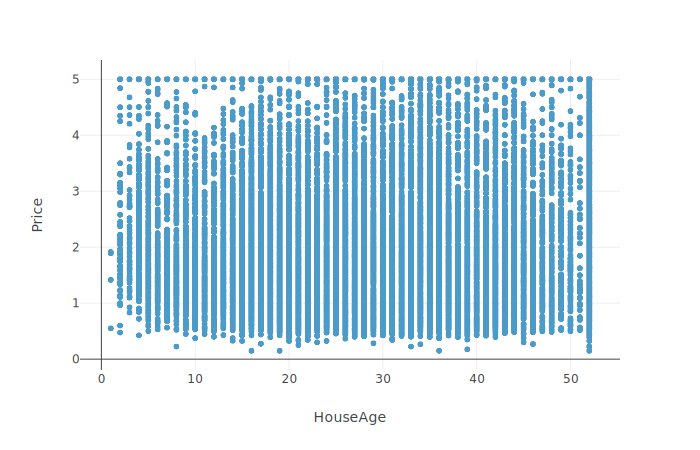

In [ ]:
px.scatter(dataset, x = 'HouseAge', y = 'Price')

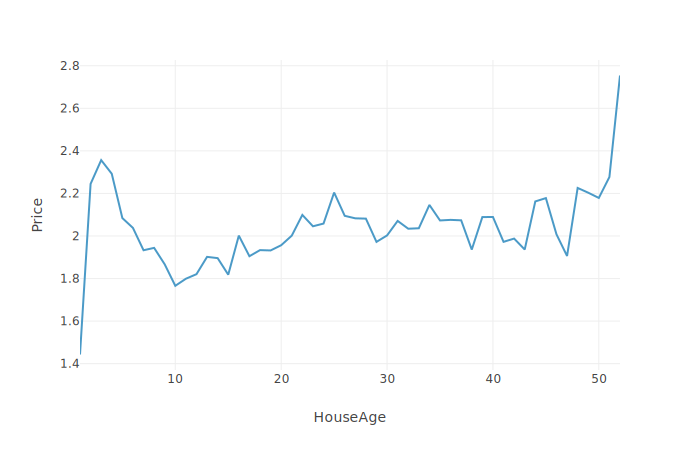

In [ ]:
# Visualize average Price vs. HouseAge
mean_price_per_houseage = dataset.groupby('HouseAge')['Price'].mean().reset_index()
mean_price_per_houseage.head()

px.line(mean_price_per_houseage, x = 'HouseAge', y = 'Price')

c. Find a way to look at the trend between _AveRooms_ & _Price_.

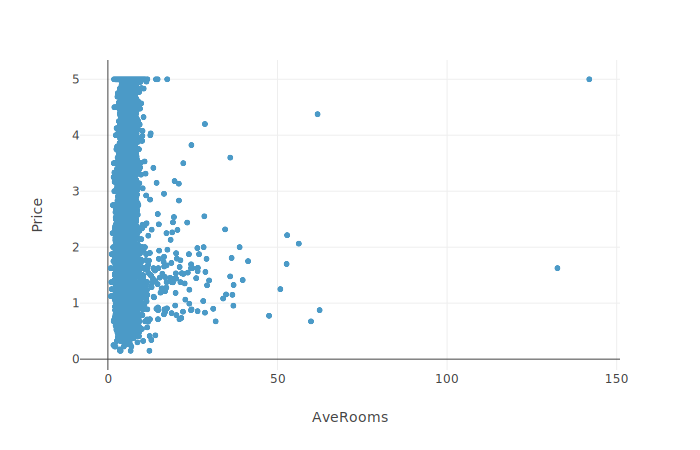

In [ ]:
px.scatter(dataset, x = 'AveRooms', y = 'Price')

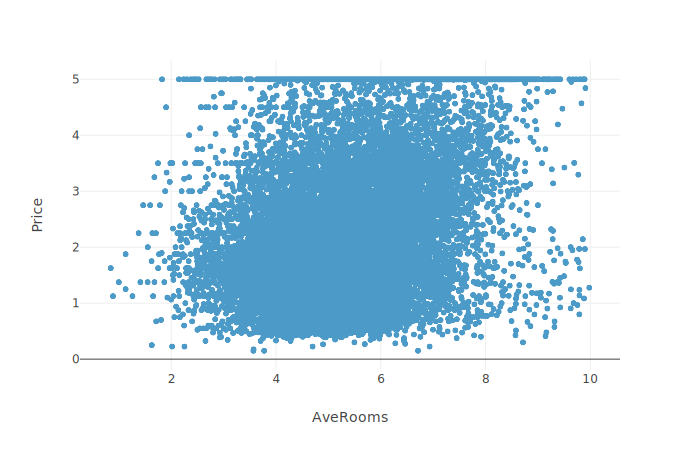

In [ ]:
# Remove outliers 
px.scatter(dataset.loc[dataset["AveRooms"]<10, :], x = 'AveRooms', y = 'Price')

d. Do the same with _AveBedrms_ & _Price_.

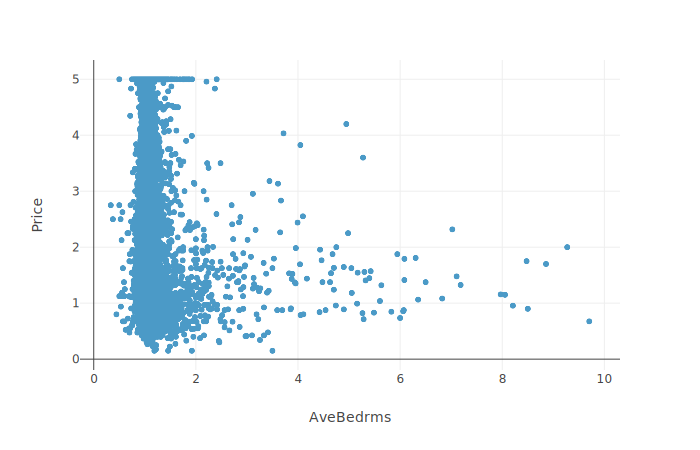

In [ ]:
px.scatter(dataset.loc[dataset["AveBedrms"]<10, :], x = 'AveBedrms', y = 'Price')

e. Do the same with the population. Simply filter the dataset so that it contains only those values for which the population is less than 15,000.

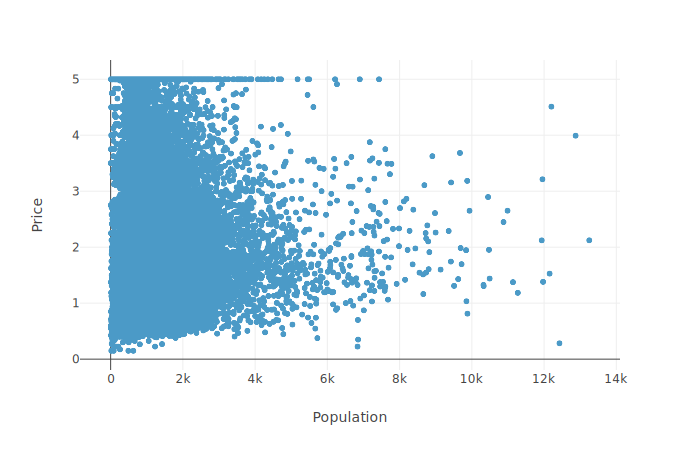

In [ ]:
px.scatter(dataset.loc[dataset['Population']<15000, :], x = 'Population', y = 'Price')

f. Do the same with _AveOccup_. This time filter the column to keep only the values below 20%.

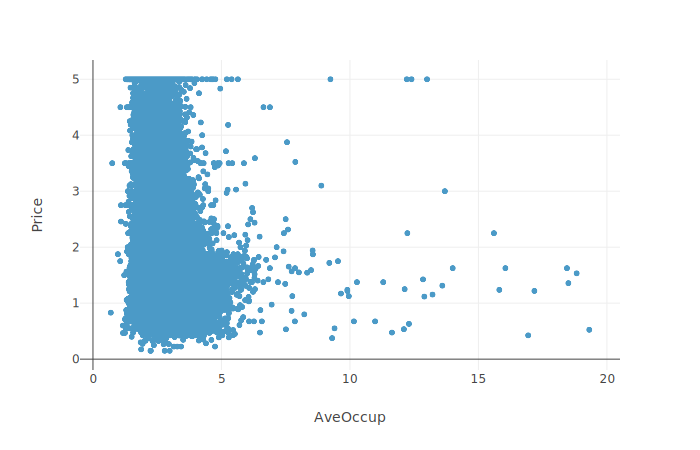

In [ ]:
px.scatter(dataset.loc[dataset['AveOccup']<20, :], x = 'AveOccup', y = 'Price')

6. Cut your dataset in half. You will have $X$ containing the explanatory variables and $y$ containing the target variable.

In [12]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1:]

In [ ]:
y

,Price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [ ]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


7. Now separate your dataset into a *train_set* and a *test_set*. We will use scikitlearn for this

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

8. In your opinion, is there a need for a standardisation phase? If so, do it via scikitlearn.

In [15]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)

X_test = sc_x.transform(X_test)
X_train

array([[ 1.59494782,  0.42218413,  0.51612264, ..., -0.08657758,
         1.03203621, -1.31385544],
       [ 3.93526909, -1.96458096,  1.16547756, ...,  0.02040994,
         1.02734363, -1.24906536],
       [ 0.40891123, -0.13472772, -0.15953196, ...,  0.00540355,
         0.94756982, -1.44343561],
       ...,
       [-1.25129777,  0.18350762, -0.35646201, ..., -0.03673645,
         2.08317352, -1.27896848],
       [-0.13113455, -1.56678678, -0.56543419, ..., -0.13444799,
        -0.96700172,  0.93386204],
       [ 1.41391454, -1.72590445,  0.38535008, ...,  0.01230285,
        -0.52120688,  0.67470171]])

9. Create your linear regression model via scikit learn

In [16]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

10. Display your R2 score via scikitlearn on your test data. Comment on your score results.

In [17]:
regressor.score(X_train, y_train)

0.6103473318996222

In [18]:
regressor.score(X_test, y_test)

0.5859753868317635

The model is just right : no overfitting, and the R2 score is significantly > 0 so we are performing way better than a "dummy" model

11. Display the coefficients of each of the explanatory variables

In [19]:
regressor.coef_

array([[ 0.84267026,  0.11889252, -0.28465822,  0.3257063 , -0.00128122,
        -0.0445865 , -0.91612029, -0.89036941]])

12. Create a DataFrame in which you will have the columns that refer to the right coefficient

In [20]:
coefs = pd.DataFrame(index=dataset.columns[:-1], data = regressor.coef_.transpose(), columns=["coefficients"])
coefs

,coefficients
MedInc,0.842670
HouseAge,0.118893
AveRooms,-0.284658
AveBedrms,0.325706
Population,-0.001281
AveOccup,-0.044587
Latitude,-0.916120
Longitude,-0.890369


13. Now compute the **absolute value** of each coefficient and order them in descending order. What can you conclude now? 

In [21]:
coefs.apply(lambda x : abs(x)).sort_values(by="coefficients", ascending=False)

,coefficients
Latitude,0.916120
Longitude,0.890369
MedInc,0.842670
AveBedrms,0.325706
AveRooms,0.284658
HouseAge,0.118893
AveOccup,0.044587
Population,0.001281


---> The most influential columns are Latitude, Longitude, MedInc and the number of beds.

14. In general, one avoids looking at the coefficients to determine the importance of features. Instead, we'll use something other than "f_regression".

Look at the documentation of sckitlearn to try to succeed in setting up this metric.

In [22]:
'''
What is a F-test

A F-test (Wikipedia) is a way of comparing the significance of the improvement of a model, with respect to the addition of new variables. 
You can use it when have a basic model M0 and a more complicated model M1, which contains all variables from M0 and some more. 
The F-test tells you if M1 is significantly better than M0, with respect to a p-value.

To do so, it uses the residual sum of squares as an error measure, and compares the reduction in error with the number of variables added, 
and the number of observation (more details on Wikipedia). Adding variables, even if they are completely random, is expected to always help the model achieve lower error by adding another dimension. The goal is to figure out if the new features are really helpful or if they are random numbers but still help the model because they add a dimension.
'''

from sklearn.feature_selection import f_regression

feature_importance = f_regression(X_train, y_train)


feature_importance

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



(array([1.48114866e+04, 1.76461304e+02, 4.38279842e+02, 4.56487061e+01,
        9.53695886e+00, 1.17994024e+01, 3.35496268e+02, 4.01974074e+01]),
 array([0.00000000e+00, 4.61033295e-40, 4.52696264e-96, 1.46206225e-11,
        2.01709196e-03, 5.93954082e-04, 3.31446160e-74, 2.35512422e-10]))

15. Then put your results in a dataframe so that they can be interpreted.

In [23]:
# Create DataFrame with feature importance
feature_ranking = pd.DataFrame(columns=dataset.columns[:-1], data=feature_importance, index=["f-score", "p-value"])
# Reshape DataFrame and sort by f-score
feature_ranking = feature_ranking.transpose().sort_values(["f-score", "p-value"], ascending=False)
# Create column with feature names
feature_ranking = feature_ranking.reset_index().rename(columns = {'index': 'feature'})
feature_ranking

,feature,f-score,p-value
0,MedInc,14811.486564,0.000000e+00
1,AveRooms,438.279842,4.526963e-96
2,Latitude,335.496268,3.314462e-74
3,HouseAge,176.461304,4.610333e-40
4,AveBedrms,45.648706,1.462062e-11
5,Longitude,40.197407,2.355124e-10
6,AveOccup,11.799402,5.939541e-04
7,Population,9.536959,2.017092e-03


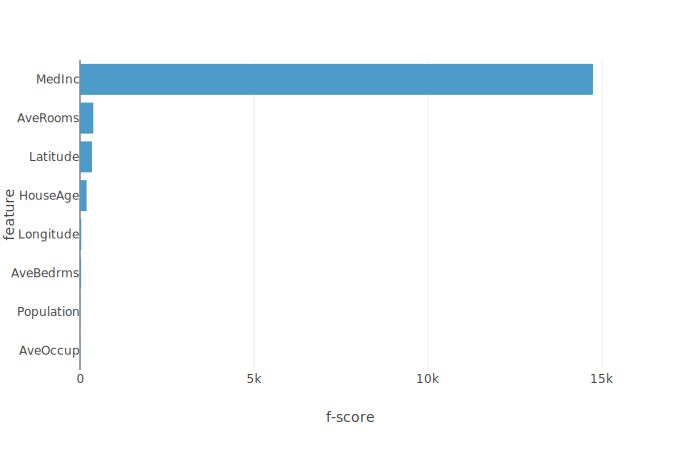

In [ ]:
px.bar(feature_ranking.sort_values(["f-score", "p-value"]), x = 'f-score', y = 'feature')

---> Here we see that the ranking of the features is slightly different. It is on this f-score that we will rely for the rest of the exercises.

## Bonus questions

16. Take a sample from your dataset via ``.sample()`` We will take 150 values

In [ ]:
dataset = dataset.sample(150)
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
5054,4.0357,44.0,6.232653,1.004082,608.0,2.481633,34.02,-118.34,1.878
16507,4.4213,11.0,7.345936,1.132325,1605.0,3.034026,37.74,-121.11,1.827
9368,5.0779,34.0,5.487179,0.990138,1219.0,2.404339,37.93,-122.52,3.339
1791,1.7500,45.0,4.205607,1.009346,1798.0,2.400534,37.93,-122.37,0.379
11011,7.0565,32.0,7.212500,0.940625,967.0,3.021875,33.77,-117.82,3.246


17. Reset the indexes to have a sequence of numbers between 0 and the size of the dataset.

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,4.0357,44.0,6.232653,1.004082,608.0,2.481633,34.02,-118.34,1.878
1,4.4213,11.0,7.345936,1.132325,1605.0,3.034026,37.74,-121.11,1.827
2,5.0779,34.0,5.487179,0.990138,1219.0,2.404339,37.93,-122.52,3.339
3,1.7500,45.0,4.205607,1.009346,1798.0,2.400534,37.93,-122.37,0.379
4,7.0565,32.0,7.212500,0.940625,967.0,3.021875,33.77,-117.82,3.246


18. Use the following help to translate the longitude and latitude of the data to find the cities corresponding to each observation: [geopy](https://pypi.org/project/geopy)

In [ ]:
pip install geopy

     |████████████████████████████████| 112 kB 7.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="yet_another_app")
location = geolocator.reverse("52.509669, 13.376294")
loc_dict = dict(location.raw)
loc_dict["address"]

{'shop': 'Steinecke',
 'road': 'Potsdamer Platz',
 'suburb': 'Tiergarten',
 'borough': 'Mitte',
 'city': 'Berlin',
 'state': 'Berlin',
 'postcode': '10785',
 'country': 'Deutschland',
 'country_code': 'de'}

In [ ]:
dataset["City"] = 0
for i in range(0, len(dataset)):
    geolocator = Nominatim(user_agent="yet_another_app_2")
    location = geolocator.reverse("{}, {}".format(dataset.loc[i, "Latitude"], dataset.loc[i, "Longitude"]), timeout = None)
    loc_dict = dict(location.raw)
    print(dict(location.raw)["address"])

    try:
        dataset.loc[i, "City"] = loc_dict["address"]["city"]
    except:
        try:
            dataset.loc[i, "City"] = loc_dict["address"]["town"]
        except:
            try:
                dataset.loc[i, "City"] = loc_dict["address"]["village"]
            except:
                pass

{'house_number': '3696', 'road': 'Buckingham Road', 'suburb': 'Baldwin Hills/Crenshaw', 'city': 'Los Angeles', 'county': 'Los Angeles County', 'state': 'California', 'postcode': '90016', 'country': 'United States', 'country_code': 'us'}
{'leisure': 'Spring Creek Golf & Country Club', 'house_number': '1580', 'road': 'Spring Creek Drive', 'town': 'Ripon', 'county': 'San Joaquin County', 'state': 'California', 'postcode': '95366', 'country': 'United States', 'country_code': 'us'}
{'house_number': '47', 'road': 'Lakeside Drive', 'village': 'Corte Madera', 'county': 'Marin County', 'state': 'California', 'postcode': '94925', 'country': 'United States', 'country_code': 'us'}
{'house_number': '129', 'road': 'South 1st Street', 'neighbourhood': 'Atchison Village', 'city': 'Richmond', 'county': 'Contra Costa County', 'state': 'California', 'postcode': '94801', 'country': 'United States', 'country_code': 'us'}
{'house_number': '13201', 'road': 'Prospect Avenue', 'suburb': 'North Tustin', 'county

{'building': 'Village Apartments', 'road': 'South 5th Street', 'neighbourhood': 'SoFA', 'city': 'San Jose', 'county': 'Santa Clara County', 'state': 'California', 'postcode': '95192', 'country': 'United States', 'country_code': 'us'}
{'house_number': '884', 'road': 'Pierino Avenue', 'city': 'Sunnyvale', 'county': 'Santa Clara County', 'state': 'California', 'postcode': '94086', 'country': 'United States', 'country_code': 'us'}
{'house_number': '8624', 'road': 'Seneca Street', 'city': 'Oakland', 'county': 'Alameda County', 'state': 'California', 'postcode': '2952', 'country': 'United States', 'country_code': 'us'}
{'house_number': '7501', 'road': 'Hall Road', 'county': 'Tehama County', 'state': 'California', 'postcode': '96021', 'country': 'United States', 'country_code': 'us'}
{'house_number': '9855', 'road': '18th Avenue', 'town': 'Lemoore', 'county': 'Kings County', 'state': 'California', 'postcode': '93245', 'country': 'United States', 'country_code': 'us'}
{'house_number': '3131', 

{'house_number': '1009', 'road': 'East Ruddock Street', 'town': 'Covina', 'county': 'Los Angeles County', 'state': 'California', 'postcode': '91724', 'country': 'United States', 'country_code': 'us'}
{'house_number': '3898', 'road': 'Stagecoach Road', 'county': 'Calaveras County', 'state': 'California', 'postcode': '95228', 'country': 'United States', 'country_code': 'us'}
{'road': 'Martin Luther King Junior Boulevard', 'suburb': 'Baldwin Hills/Crenshaw', 'city': 'Los Angeles', 'county': 'Los Angeles County', 'state': 'California', 'postcode': '90016', 'country': 'United States', 'country_code': 'us'}
{'house_number': '3591', 'road': 'Lois Canyon Road', 'county': 'San Diego County', 'state': 'California', 'postcode': '91935', 'country': 'United States', 'country_code': 'us'}
{'city': 'Pomona', 'county': 'Los Angeles County', 'state': 'California', 'postcode': '91766', 'country': 'United States', 'country_code': 'us'}
{'amenity': 'Santa Fe High School', 'road': 'Jersey Avenue', 'suburb'

{'house_number': '1943', 'road': 'Mendocino Street', 'neighbourhood': 'Richmond Annex', 'city': 'Richmond', 'county': 'Contra Costa County', 'state': 'California', 'postcode': '94804', 'country': 'United States', 'country_code': 'us'}
{'house_number': '35826', 'road': 'Avenue 13 1/4', 'county': 'Madera County', 'state': 'California', 'postcode': '93636', 'country': 'United States', 'country_code': 'us'}
{'house_number': '4022', 'road': '25th Street', 'neighbourhood': 'Noe Valley', 'city': 'San Francisco', 'county': 'San Francisco', 'state': 'California', 'postcode': '94110', 'country': 'United States', 'country_code': 'us'}
{'house_number': '712', 'road': '19th Street', 'city': 'Sacramento', 'county': 'Sacramento County', 'state': 'California', 'postcode': '95811', 'country': 'United States', 'country_code': 'us'}
{'house_number': '3788', 'road': 'Randolph Avenue', 'neighbourhood': 'Baird Park', 'city': 'Los Angeles', 'county': 'Los Angeles County', 'state': 'California', 'postcode': '

19. If there are cities that you have not found, replace the value in the cell with ```unknown```.

In [ ]:
dataset_sample = dataset

In [ ]:
dataset_sample.loc[dataset_sample['City'] == 0, 'City'] = "Unknown"

21. Redo a linear regression model by including cities as explanatory variables. What score do you find?

In [ ]:
# OHE of cities 
dataset_dummy= pd.get_dummies(dataset_sample, drop_first=True) # don't do this if you plan to use your model on new data !
dataset_dummy.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price,City_Arcadia,...,City_Thousand Oaks,City_Torrance,City_Tustin,City_Unknown,City_Vallejo,City_Walnut Creek,City_Watsonville,City_West Covina,City_West Hollywood,City_Yorba Linda
0,3.6974,40.0,4.841130,1.096205,2034.0,1.795234,34.11,-118.34,5.00001,0,...,0,0,0,0,0,0,0,0,0,0
1,3.7361,35.0,5.734848,1.143939,474.0,3.590909,33.93,-118.16,1.79800,0,...,0,0,0,0,0,0,0,0,0,0
2,10.7569,52.0,7.450617,0.938272,465.0,2.870370,37.75,-122.46,5.00001,0,...,0,0,0,0,0,0,0,0,0,0
3,4.2865,38.0,5.757256,1.079156,1141.0,3.010554,34.19,-118.51,2.21100,0,...,0,0,0,0,0,0,0,0,0,0
4,3.3534,26.0,6.087097,1.154839,1913.0,3.085484,34.13,-117.24,0.98900,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Separate variables
X = dataset_dummy.loc[:, dataset_dummy.columns != "Price"]
y = dataset_dummy.loc[:, dataset_dummy.columns == "Price"]

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.15)

In [ ]:
# Normalize variables
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [ ]:
# Train model 
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Evaluate R2 on train set
regressor.score(X_train, y_train)

0.8378675371625773

In [ ]:
# Evaluate R2 on test set
regressor.score(X_test, y_test)

-5.896056016234598e+26

22. Our model is generally not as good. Why do you think that is? 

----> We have much less data. We'd have to take a bigger sample for our model to have enough to train properly. 